# Salaries After Undergraduate


#### Kayla Wen, Colin Chen, Paria Sokhanran, Justin Leung 

## Part I: Introduction
The decision of what to study in university is an undeniable challenge many students encounter. Most students value stability; therefore, they aim to complete their degree and obtain a well-paying job post-graduation. Our group is interested in investigating the correlation between compensation and employment rates in various industries. Therefore, we aim to answer the question: Is there a relationship between salaries and employment rates? This question stemmed from our hypothesis that industries with higher salaries have lower employment rates due to their lack of funding for more employees. To accomplish this, we will use a data set taken from Kaggle, which includes multiple files with information about individuals’ majors, career prospects, and other personal information such as age. Because there are no specific filters in this dataset, there is much diversity in terms of the demographics of the data. For instance, not everyone in this dataset came from the same graduating year and/or financial background, which could have resulted in some variability in the data. 

The rationale for choosing salary and employment rates as the main explanatory variables stem mainly from a Forbes article and a report from the Government of Canada containing information about hourly wages and employment rates. Initially, we started this investigation because we were curious about our own career prospects as university students; however, as explained in the Forbes articles, the current data “support the notion that higher minimum wages have a cost, namely fewer employment opportunities for lower-skill workers” (Millsap, 2018, para 6). With this in mind, we hypothesized that higher salaries essentially resulted in lower employment rates, and therefore, we wanted to test these relationships with jobs of heavily varying pay. Furthermore, this article explored the impacts of increased minimum wages in three cities–San Francisco, Los Angeles, and Seattle–where San Francisco was the least affected by the dropped employment rates, while Seattle was the most affected (Millsap, 2018). Millsap (2018) hypothesized that these differences could have resulted from factors such as population size, local economic situations, and the current financial earnings of most of the population. This inspired our other exploratory variables, where we divided our salary into different percentiles. Because we saw a different impact on the unemployment rates of the three cities, we wanted to see if the same would be seen in different earning brackets of a certain career.

The second source that helped us decide on our exploratory variables comes from the Government of Canada. In this, we took information from Charts 2 and 9, which show the employment rate in the manufacturing industry and the hourly wages between 2000-2017, respectively (Bernard & Morisette, 2018). Chart 2 shows an apparent decrease in employment rates of manufacturing workers, while a general increase in hourly wages is seen in Chart 9 (Bernard & Morisette, 2018). This helped to further fuel our interest in seeing if higher salaries resulted in lost jobs or fewer employment opportunities. While this chart mainly focused on the manufacturing industry, we wanted to see if it could be translated to other industries within our dataset

## Part II: Methods & Results

We will conduct our data analysis using the techniques and functions from the worksheets and tutorial sets and expect much of our coding to be based on the content we have learned throughout the course. We are using a dataset from Kaggle, which we intend to mainly use the information from the columns "Unemployment Rate", “Median”, “P25th”, and “P75th”. We would like to investigate if the salary has any correlation to the employment rate.

To visualize our findings, we will be creating 3 scatter plots. For each of the plots, the y-axis will be labeled “Employment Rate (%)”, representing the percentage of graduates employed from the dataset, and the x-axis will be labeled “Median Salary (USD)”, “25th Percentile Salary (USD)”, and “75th Percentile Salary (USD)”. Including the data from the columns “P25th” and “P75th” will enable us to provide a more comprehensive perspective on the relationship between the salary of each graduated major and their respective employment rate. 

Through K-NN regression, we can determine the potential significance that exists between salaries and employment rates and gain further insight into their relationship. Additionally, we will use cross-validation to determine the most appropriate K neighbors value and to improve the accuracy of our model. 

In [1]:
#Run this cell first

library(tidyverse) 
library(testthat)
library(digest)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 15)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

### Reading the Data Set and Splitting Up

In [30]:
## Read the data of the average salary of college graduates
## Add in a column for employment rate 

data <- read_csv(file = "https://raw.githubusercontent.com/colin-c/Salaries-in-Science/main/data/all-ages.csv") |>
    mutate(Employment_rate = 100*(1 - Unemployment_rate)) 

head(data)
tail(data)

Rows: 173 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Major, Major_category
dbl (10): index, Major_code, Total, Employed, Employed_full_time_year_round,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


index,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Employment_rate
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.02614711,50000,34000,80000,97.38529
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.02863606,54000,36000,80000,97.13639
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.03024832,63000,40000,98000,96.97517
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.04267890,46000,30000,72000,95.73211
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.04918845,62000,38500,90000,95.08116
5,1105,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,51077,2070,0.03179089,50000,35000,75000,96.82091


index,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Employment_rate
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
167,6210,INTERNATIONAL BUSINESS,Business,86064,66453,51012,5106,0.07135371,54000,38600,80000,92.86463
168,6211,HOSPITALITY MANAGEMENT,Business,200854,163393,122499,8862,0.05144698,49000,33000,70000,94.85530
169,6212,MANAGEMENT INFORMATION SYSTEMS AND STATISTICS,Business,156673,134478,118249,6186,0.04397714,72000,50000,100000,95.60229
170,6299,MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION,Business,102753,77471,61603,4308,0.05267856,53000,36000,83000,94.73214
171,6402,HISTORY,Humanities & Liberal Arts,712509,478416,354163,33725,0.06585101,50000,35000,80000,93.41490
172,6403,UNITED STATES HISTORY,Humanities & Liberal Arts,17746,11887,8204,943,0.07349961,50000,39000,81000,92.65004


In [40]:
## split the data set into three sets, according to the different percentiles in use 
## 25th percentile = p25th_data
## Median = p50th_data
## 75th percentile = p75th_data

p25th_data <- data |>
    select(Employment_rate, P25th)
head(p25th_data)
tail(p25th_data)

p50th_data <- data |>
    select(Employment_rate, Median) |>
    rename(P50th = Median)
head(p50th_data)
tail(p50th_data)

p75th_data <- data |>
    select(Employment_rate, P75th)
head(p75th_data)
tail(p75th_data)

Employment_rate,P25th
<dbl>,<dbl>
97.38529,34000
97.13639,36000
96.97517,40000
95.73211,30000
95.08116,38500
96.82091,35000


Employment_rate,P25th
<dbl>,<dbl>
92.86463,38600
94.85530,33000
95.60229,50000
94.73214,36000
93.41490,35000
92.65004,39000


Employment_rate,P50th
<dbl>,<dbl>
97.38529,50000
97.13639,54000
96.97517,63000
95.73211,46000
95.08116,62000
96.82091,50000


Employment_rate,P50th
<dbl>,<dbl>
92.86463,54000
94.85530,49000
95.60229,72000
94.73214,53000
93.41490,50000
92.65004,50000


Employment_rate,P75th
<dbl>,<dbl>
97.38529,80000
97.13639,80000
96.97517,98000
95.73211,72000
95.08116,90000
96.82091,75000


Employment_rate,P75th
<dbl>,<dbl>
92.86463,80000
94.85530,70000
95.60229,100000
94.73214,83000
93.41490,80000
92.65004,81000


### Plot each scatter plot relating to the different salary percentiles

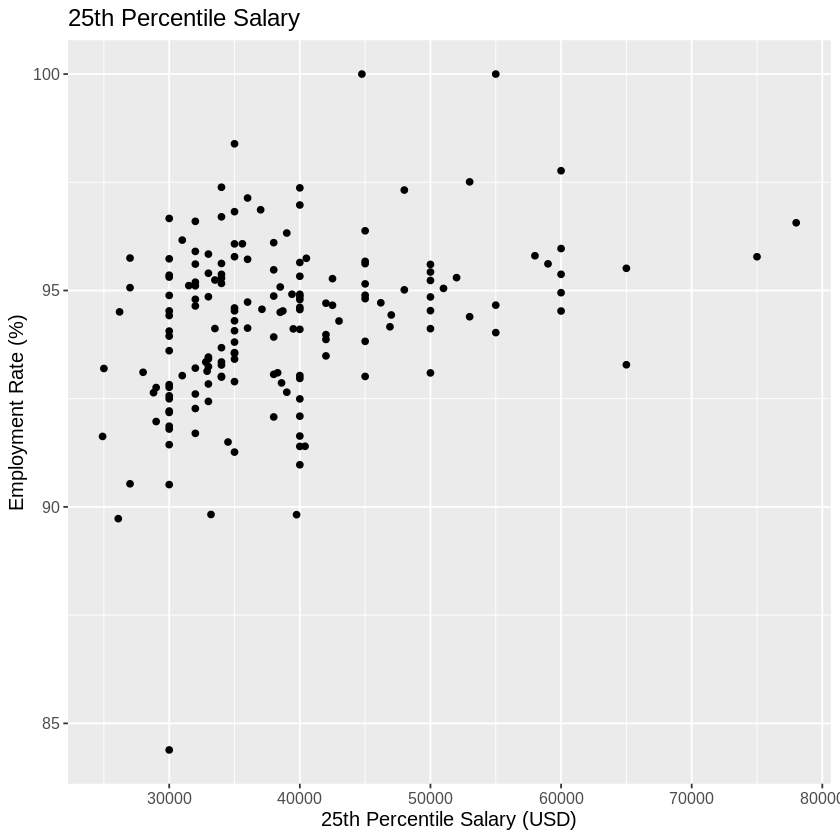

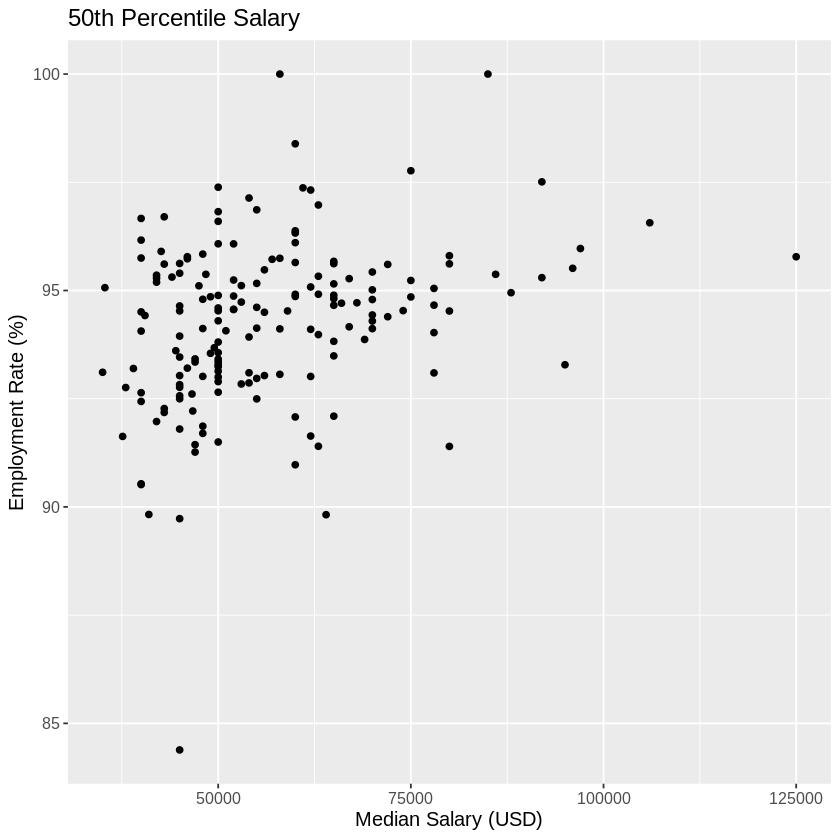

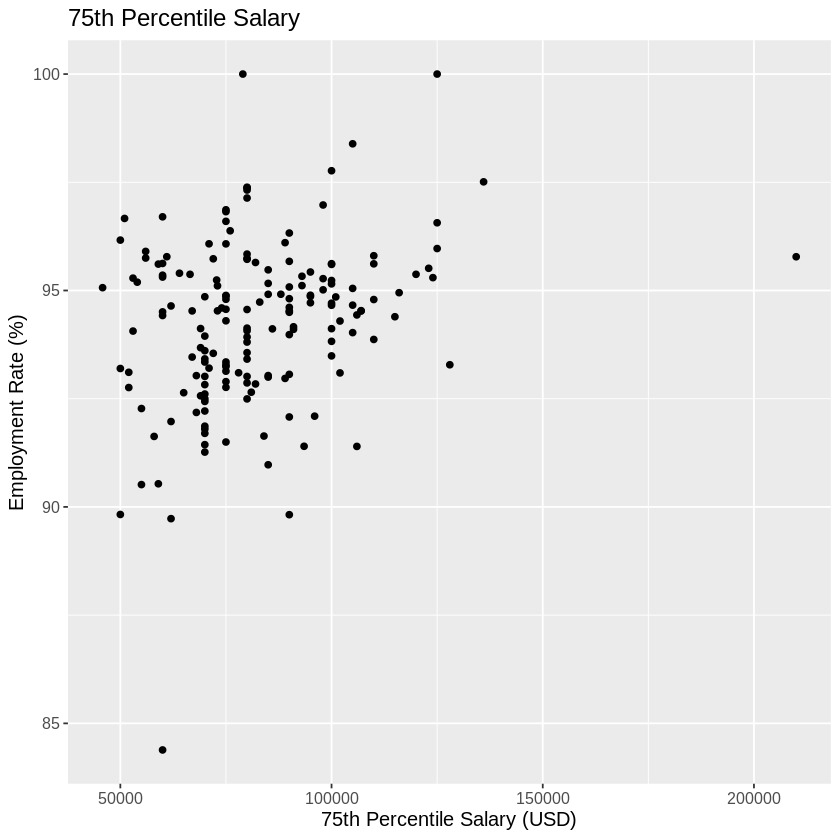

In [37]:
## Before the classifiction, create a visualization of the data where
## the predictor variable, Salary is on the x-axis and the response
## variable, Employment Rate is on the y-axis

p25th_plot <- p25th_data |>
    ggplot(aes(x = P25th, y = Employment_rate)) +
    geom_point() +
    labs(x = "25th Percentile Salary (USD)", y = "Employment Rate (%)") +
    ggtitle("25th Percentile Salary") +
    theme(text = element_text(size=12))

p50th_plot <- p50th_data |>
    ggplot(aes(x = P50th, y = Employment_rate)) +
    geom_point() +
    labs(x = "Median Salary (USD)", y = "Employment Rate (%)") +
    ggtitle("50th Percentile Salary") +
    theme(text = element_text(size=12))

p75th_plot <- p75th_data |>
    ggplot(aes(x = P75th, y = Employment_rate)) +
    geom_point() +
    labs(x = "75th Percentile Salary (USD)", y = "Employment Rate (%)") +
    ggtitle("75th Percentile Salary") +
    theme(text = element_text(size=12)) 

p25th_plot
p50th_plot
p75th_plot

### 25th Percentile Salary Data

In [5]:
## Split data into training and testing
set.seed(100)

p25th_data_split <- initial_split(p25th_data, prop = 0.75, strata = NULL)
p25th_data_training <- training(p25th_data_split)
p25th_data_testing <- testing(p25th_data_split)

head(p25th_data_training)

Employment_rate,P25th
<dbl>,<dbl>
92.49797,30000
97.76667,60000
96.86432,37000
95.73211,30000
95.61561,59000
92.76261,30000


In [6]:
## Use cross-validation to choose K

p25th_recipe <- recipe(Employment_rate ~ P25th, data = p25th_data_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

p25th_spec <- nearest_neighbor(weight_func = "rectangular", 
                                      neighbors = tune()) |>
                        set_engine("kknn") |>
                        set_mode("regression")

p25th_vfold <- vfold_cv(p25th_data_training, v = 5, strata = Employment_rate)

p25th_wkflw <- workflow() |>
  add_recipe(p25th_recipe) |>
  add_model(p25th_spec)

p25th_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [7]:
## Cross-validation for a grid of numbers of neighbors from 1-101 to find
## the value of K that minimizes RMSPE
## That K value will be used to perform our analysis

gridvals <- tibble(neighbors = seq(1,101))

p25th_results <- p25th_wkflw |>
  tune_grid(resamples = p25th_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

## show the results
head(p25th_results)

! Fold1: preprocessor 1/1, model 1/1: 101 samples were requested but there were 101 rows in the data. 96 will ...

! Fold2: preprocessor 1/1, model 1/1: 101 samples were requested but there were 101 rows in the data. 96 will ...

! Fold3: preprocessor 1/1, model 1/1: 101 samples were requested but there were 104 rows in the data. 99 will ...

! Fold4: preprocessor 1/1, model 1/1: 101 samples were requested but there were 105 rows in the data. 100 will...

! Fold5: preprocessor 1/1, model 1/1: 101 samples were requested but there were 105 rows in the data. 100 will...



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,2.353871,5,0.1605271,Preprocessor1_Model001
2,rmse,standard,2.118276,5,0.1721779,Preprocessor1_Model002
3,rmse,standard,2.003422,5,0.1008302,Preprocessor1_Model003
4,rmse,standard,1.965805,5,0.1205410,Preprocessor1_Model004
5,rmse,standard,1.872207,5,0.1431690,Preprocessor1_Model005
6,rmse,standard,1.845725,5,0.1252776,Preprocessor1_Model006


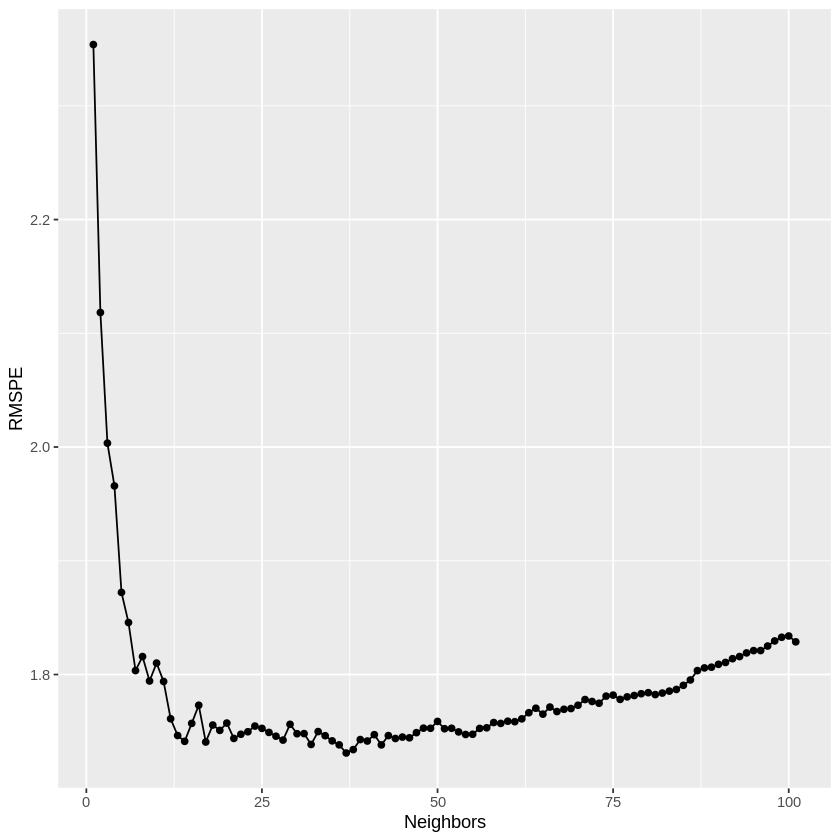

In [8]:
## Here is a vizualization of the RMSPE values for the different K values. 

p25th_RMSPE_plot <- ggplot(p25th_results, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    xlab("Neighbors") +
    ylab("RMSPE")

p25th_RMSPE_plot

In [9]:
## The above plot shows that our K value should be around 30-40. 

## This will show the row of the minimum RMSPE
## which will give us the exact K value 
## that we want to use for our analysis

p25th_min <- p25th_results |>
  filter(mean == min(mean))

p25th_min

## The K value that gives the smallest RMSPE is 37

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
37,rmse,standard,1.731012,5,0.1267272,Preprocessor1_Model037


In [10]:
## We will retrain the model using the K value we found above 
## before using our model on the testing data

k25_value <- p25th_min |> 
    pull(neighbors)

p25th_spec_test <- nearest_neighbor(weight_func = "rectangular", neighbors = k25_value) |>
    set_engine("kknn") |>
    set_mode("regression")

p25th_fit_test <- workflow() |>
    add_recipe(p25th_recipe) |>
    add_model(p25th_spec_test) |>
    fit(data = p25th_data_training)

p25th_summary_test <- p25th_fit_test |>
  predict(p25th_data_testing) |>
  bind_cols(p25th_data_testing) |>
  metrics(truth = Employment_rate, estimate = .pred) |>
  filter(.metric == 'rmse')

p25th_summary_test

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.980457


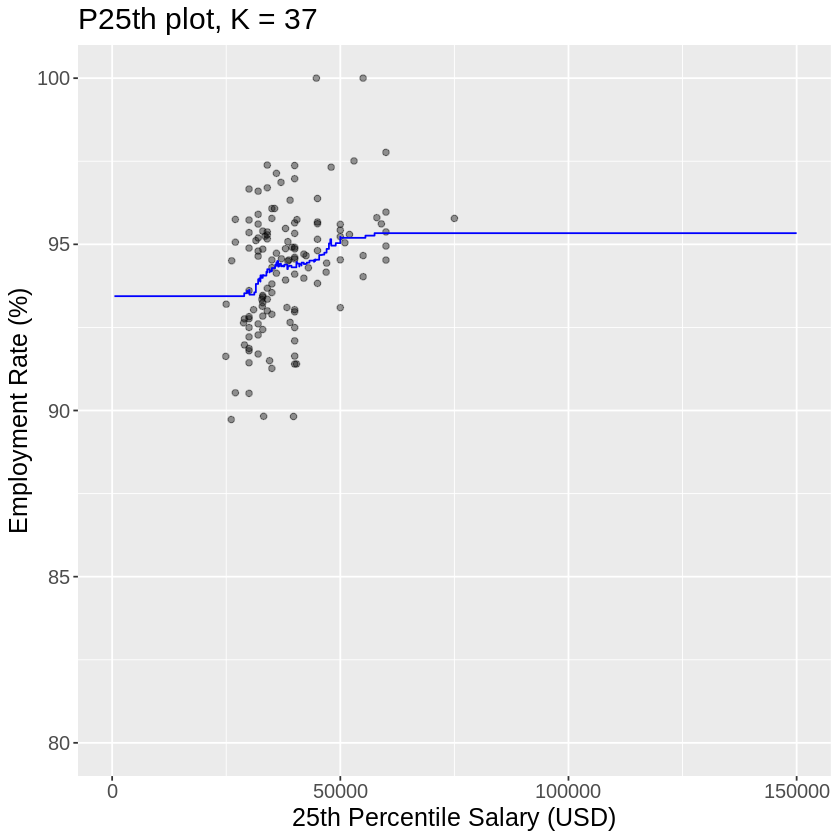

In [11]:
## We will evaluate our model and how well it predicts for new observations
## using the testing data we set aside from earlier


p25th_preds <- tibble(P25th = seq(from = 500, to = 150000, by = 10))

p25th_preds <- p25th_fit_test |>
  predict(p25th_preds) |>
  bind_cols(p25th_preds)

p25th_final <- ggplot(p25th_data_training, aes(x = P25th, y = Employment_rate)) +
  geom_point(alpha = 0.4) +
  geom_line(data = p25th_preds, 
            mapping = aes(x = P25th, y = .pred), 
            color = "blue") +
  xlab("25th Percentile Salary (USD)") +
  ylab("Employment Rate (%)") +
  ggtitle(paste0("P25th plot, K = ", k25_value)) + 
  theme(text = element_text(size = 12))+
  xlim(0,150000)+
  ylim(80,100)+
  theme(text = element_text(size = 15))

p25th_final

### 50th Percentile Salary Data (Median)

In [12]:
## Split data into training and testing
set.seed(100)

p50th_data_split <- initial_split(p50th_data, prop = 0.75, strata = NULL)
p50th_data_training <- training(p50th_data_split)
p50th_data_testing <- testing(p50th_data_split)

head(p50th_data_training)

Employment_rate,P50th
<dbl>,<dbl>
92.49797,45000
97.76667,75000
96.86432,55000
95.73211,46000
95.61561,80000
92.76261,45000


In [13]:
## Use cross-validation to choose K

p50th_recipe <- recipe(Employment_rate ~ P50th, data = p50th_data_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

p50th_spec <- nearest_neighbor(weight_func = "rectangular", 
                                      neighbors = tune()) |>
                        set_engine("kknn") |>
                        set_mode("regression")

p50th_vfold <- vfold_cv(p50th_data_training, v = 5, strata = Employment_rate)

p50th_wkflw <- workflow() |>
  add_recipe(p50th_recipe) |>
  add_model(p50th_spec)

p50th_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [14]:
## Cross-validation for a grid of numbers of neighbors from 1-101 to find
## the value of K that minimizes RMSPE
## That K value will be used to perform our analysis

gridvals <- tibble(neighbors = seq(1,101))

p50th_results <- p50th_wkflw |>
  tune_grid(resamples = p50th_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

## show the results
head(p50th_results)

! Fold1: preprocessor 1/1, model 1/1: 101 samples were requested but there were 101 rows in the data. 96 will ...

! Fold2: preprocessor 1/1, model 1/1: 101 samples were requested but there were 101 rows in the data. 96 will ...

! Fold3: preprocessor 1/1, model 1/1: 101 samples were requested but there were 104 rows in the data. 99 will ...

! Fold4: preprocessor 1/1, model 1/1: 101 samples were requested but there were 105 rows in the data. 100 will...

! Fold5: preprocessor 1/1, model 1/1: 101 samples were requested but there were 105 rows in the data. 100 will...



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,2.320602,5,0.09412661,Preprocessor1_Model001
2,rmse,standard,1.962081,5,0.15110491,Preprocessor1_Model002
3,rmse,standard,1.856359,5,0.12078103,Preprocessor1_Model003
4,rmse,standard,1.833775,5,0.13902500,Preprocessor1_Model004
5,rmse,standard,1.788729,5,0.12403333,Preprocessor1_Model005
6,rmse,standard,1.801929,5,0.11809152,Preprocessor1_Model006


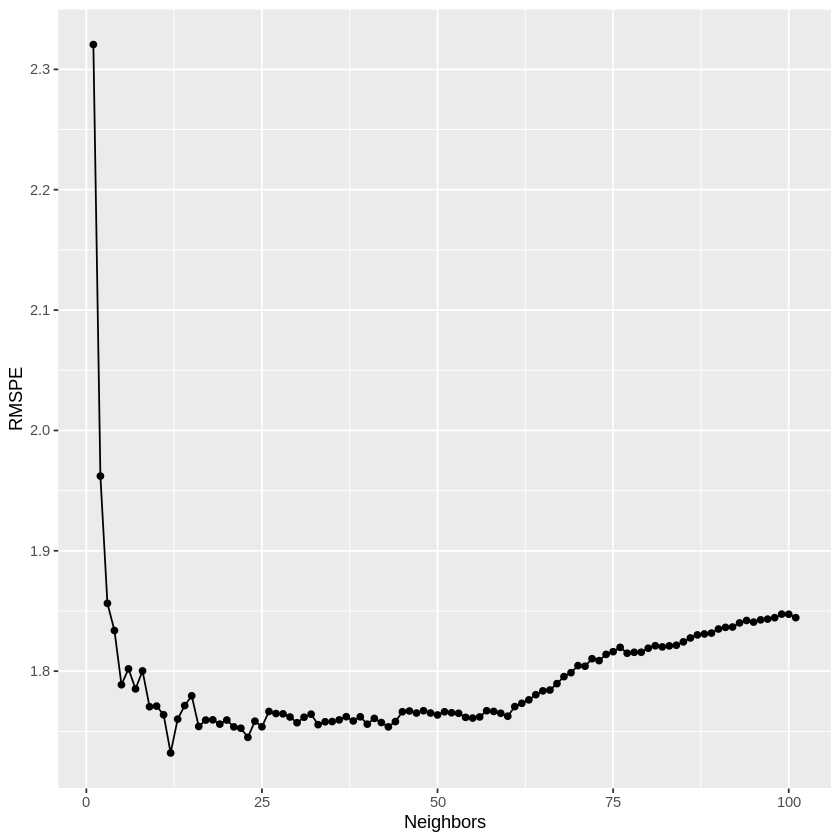

In [15]:
#Here is a vizualization of the RMSPE values for the different K values. 

p50th_RMSPE_plot <- ggplot(p50th_results, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    xlab("Neighbors") +
    ylab("RMSPE")

p50th_RMSPE_plot


In [16]:
## The above plot shows that our K value should be around 10-15. 

## This will show the row of the minimum RMSPE
## which will give us the exact K value 
## that we want to use for our analysis

p50th_min <- p50th_results |>
  filter(mean == min(mean))

p50th_min

## The K value that gives the smallest RMSPE is 12

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
12,rmse,standard,1.732024,5,0.09597336,Preprocessor1_Model012


In [17]:
## In order to use our model on the testing data, we need to retrain
## the KNN regression model on the training data set using the K value
## we found in the earlier step that minimizes RMSPE

k50_value <- p50th_min |> 
    pull(neighbors)

p50th_spec_test <- nearest_neighbor(weight_func = "rectangular", neighbors = k50_value) |>
    set_engine("kknn") |>
    set_mode("regression")

p50th_fit_test <- workflow() |>
    add_recipe(p50th_recipe) |>
    add_model(p50th_spec_test) |>
    fit(data = p50th_data_training)

p50th_summary_test <- p50th_fit_test |>
  predict(p50th_data_testing) |>
  bind_cols(p50th_data_testing) |>
  metrics(truth = Employment_rate, estimate = .pred) |>
  filter(.metric == 'rmse')

p50th_summary_test

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2.143351


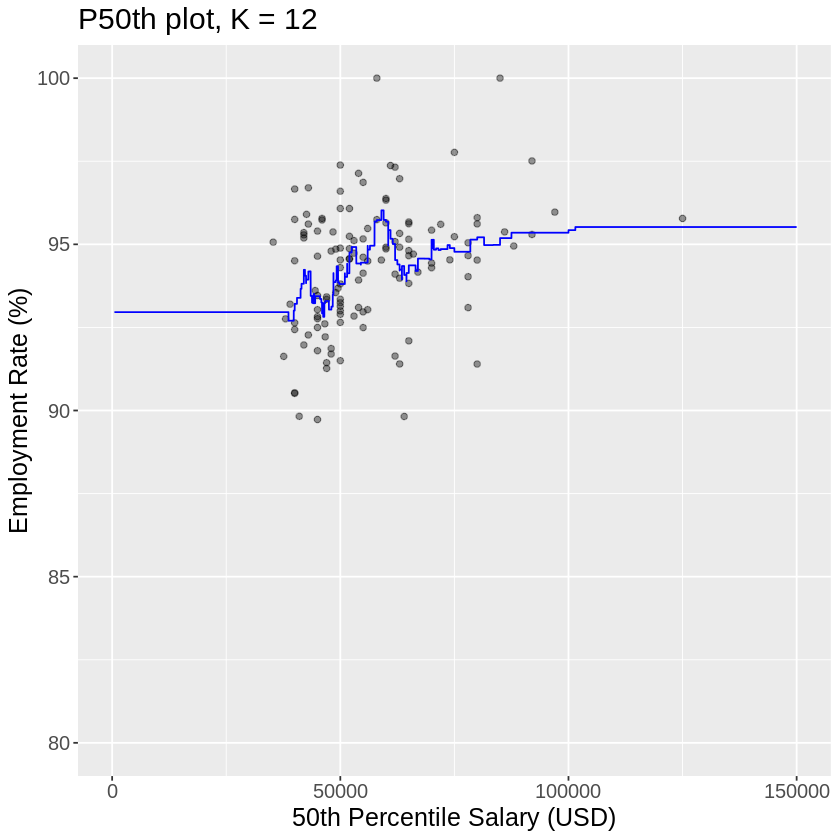

In [18]:
## We will evaluate our model and see how well it predicts for new observations
## using the testing data we set aside from earlier

p50th_preds <- tibble(P50th = seq(from = 500, to = 150000, by = 10))

p50th_preds <- p50th_fit_test |>
  predict(p50th_preds) |>
  bind_cols(p50th_preds)

p50th_final <- ggplot(p50th_data_training, aes(x = P50th, y = Employment_rate)) +
  geom_point(alpha = 0.4) +
  geom_line(data = p50th_preds, 
            mapping = aes(x = P50th, y = .pred), 
            color = "blue") +
  xlab("50th Percentile Salary (USD)") +
  ylab("Employment Rate (%)") +
  ggtitle(paste0("P50th plot, K = ", k50_value)) + 
  theme(text = element_text(size = 12))+
  xlim(0,150000)+
  ylim(80,100)+
  theme(text = element_text(size = 15))

p50th_final

### 75th Percentile Salary Data

In [19]:
## Split data into training and testing
set.seed(100)

p75th_data_split <- initial_split(p75th_data, prop = 0.75, strata = NULL)
p75th_data_training <- training(p75th_data_split)
p75th_data_testing <- testing(p75th_data_split)

head(p75th_data_training)

Employment_rate,P75th
<dbl>,<dbl>
92.49797,70000
97.76667,100000
96.86432,75000
95.73211,72000
95.61561,110000
92.76261,75000


In [20]:
## Use cross-validation to choose K

p75th_recipe <- recipe(Employment_rate ~ P75th, data = p75th_data_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

p75th_spec <- nearest_neighbor(weight_func = "rectangular", 
                                      neighbors = tune()) |>
                        set_engine("kknn") |>
                        set_mode("regression")

p75th_vfold <- vfold_cv(p75th_data_training, v = 5, strata = Employment_rate)

p75th_wkflw <- workflow() |>
  add_recipe(p75th_recipe) |>
  add_model(p75th_spec)

p75th_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [21]:
## Cross-validation for a grid of numbers of neighbors from 1-101 to find
## the value of K that minimizes RMSPE
## That K value will be used to perform our analysis

gridvals <- tibble(neighbors = seq(1,101))

p75th_results <- p75th_wkflw |>
  tune_grid(resamples = p75th_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

## show the results
head(p75th_results)

! Fold1: preprocessor 1/1, model 1/1: 101 samples were requested but there were 101 rows in the data. 96 will ...

! Fold1: internal: A correlation computation is required, but `estimate` is constant and ha...

! Fold2: preprocessor 1/1, model 1/1: 101 samples were requested but there were 101 rows in the data. 96 will ...

! Fold3: preprocessor 1/1, model 1/1: 101 samples were requested but there were 104 rows in the data. 99 will ...

! Fold4: preprocessor 1/1, model 1/1: 101 samples were requested but there were 105 rows in the data. 100 will...

! Fold5: preprocessor 1/1, model 1/1: 101 samples were requested but there were 105 rows in the data. 100 will...



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,2.213912,5,0.08828979,Preprocessor1_Model001
2,rmse,standard,2.061734,5,0.07760069,Preprocessor1_Model002
3,rmse,standard,1.961439,5,0.10974084,Preprocessor1_Model003
4,rmse,standard,1.903833,5,0.08487722,Preprocessor1_Model004
5,rmse,standard,1.848293,5,0.09333390,Preprocessor1_Model005
6,rmse,standard,1.836922,5,0.08990097,Preprocessor1_Model006


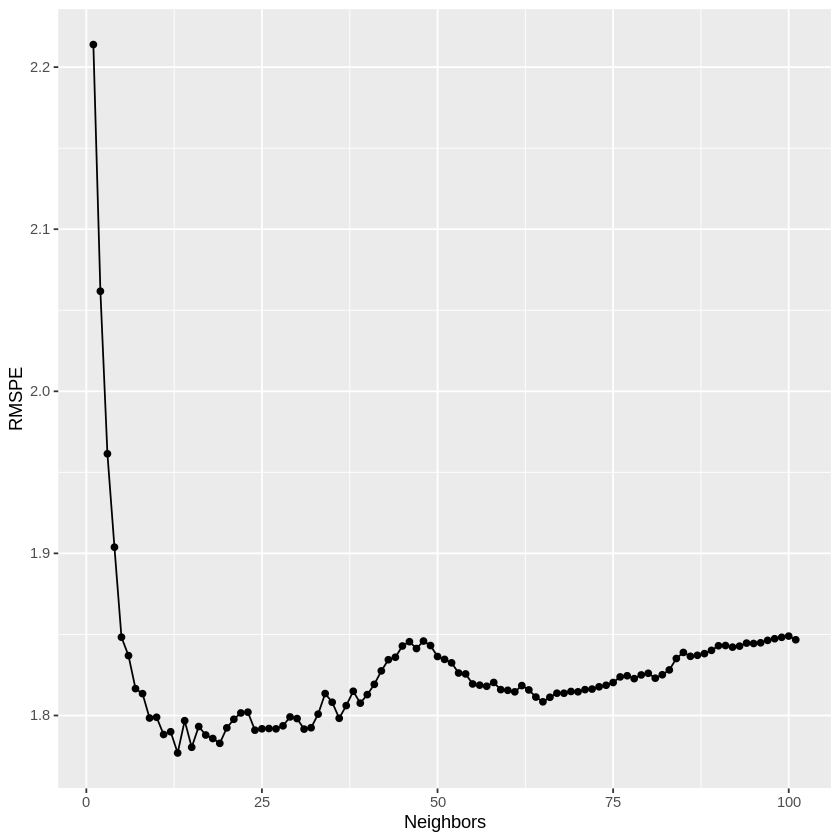

In [22]:
## Here is a vizualization of the RMSPE values for the different K values. 

p75th_RMSPE_plot <- ggplot(p75th_results, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    xlab("Neighbors") +
    ylab("RMSPE")

p75th_RMSPE_plot

In [23]:
## The above plot shows that our K value should be around 10-15. 

## This will show the row of the minimum RMSPE
## which will give us the exact K value 
## that we want to use for our analysis

p75th_min <- p75th_results |>
  filter(mean == min(mean))

p75th_min

## The K value that gives the smallest RMSPE is 13

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
13,rmse,standard,1.776854,5,0.08610237,Preprocessor1_Model013


In [24]:
## We will retrain the model using the K value we found above 
## before using our model on the testing data

k75_value <- p75th_min |> 
    pull(neighbors)

p75th_spec_test <- nearest_neighbor(weight_func = "rectangular", neighbors = k75_value) |>
    set_engine("kknn") |>
    set_mode("regression")

p75th_fit_test <- workflow() |>
    add_recipe(p75th_recipe) |>
    add_model(p75th_spec_test) |>
    fit(data = p75th_data_training)

p75th_summary_test <- p75th_fit_test |>
  predict(p75th_data_testing) |>
  bind_cols(p75th_data_testing) |>
  metrics(truth = Employment_rate, estimate = .pred) |>
  filter(.metric == 'rmse')

p75th_summary_test

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2.043057


Warning message:
“Removed 1 rows containing missing values (geom_point).”


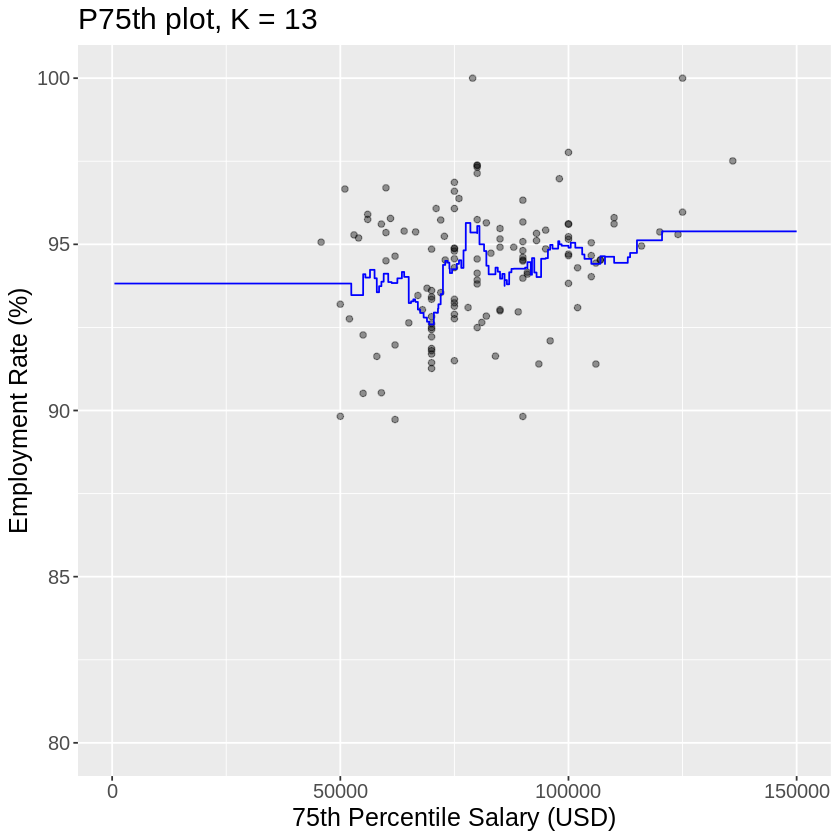

In [32]:
## We will evaluate our model and how well it predicts for new observations
## using the testing data we set aside from earlier

p75th_preds <- tibble(P75th = seq(from = 500, to = 150000, by = 10))

p75th_preds <- p75th_fit_test |>
  predict(p75th_preds) |>
  bind_cols(p75th_preds)

p75th_final <- ggplot(p75th_data_training, aes(x = P75th, y = Employment_rate)) +
  geom_point(alpha = 0.4) +
  geom_line(data = p75th_preds, 
            mapping = aes(x = P75th, y = .pred), 
            color = "blue") +
  xlab("75th Percentile Salary (USD)") +
  ylab("Employment Rate (%)") +
  ggtitle(paste0("P75th plot, K = ", k75_value)) + 
  theme(text = element_text(size = 12))+
  xlim(0,150000)+
  ylim(80,100)+ 
  theme(text = element_text(size = 15))

p75th_final

### Individual Analyses

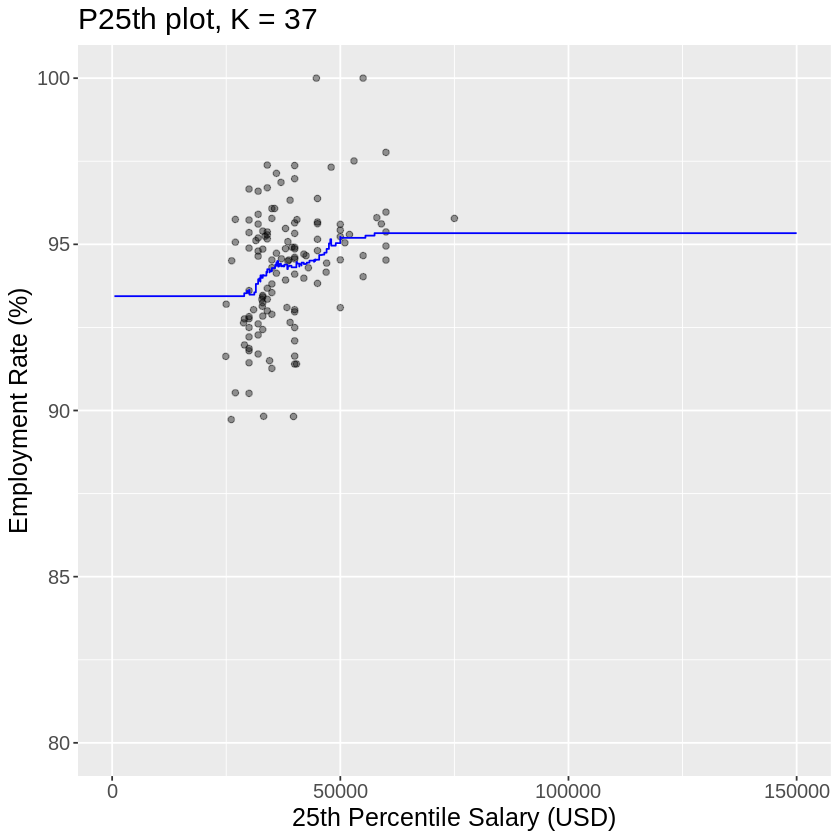

Warning message:
“Removed 1 rows containing missing values (geom_point).”


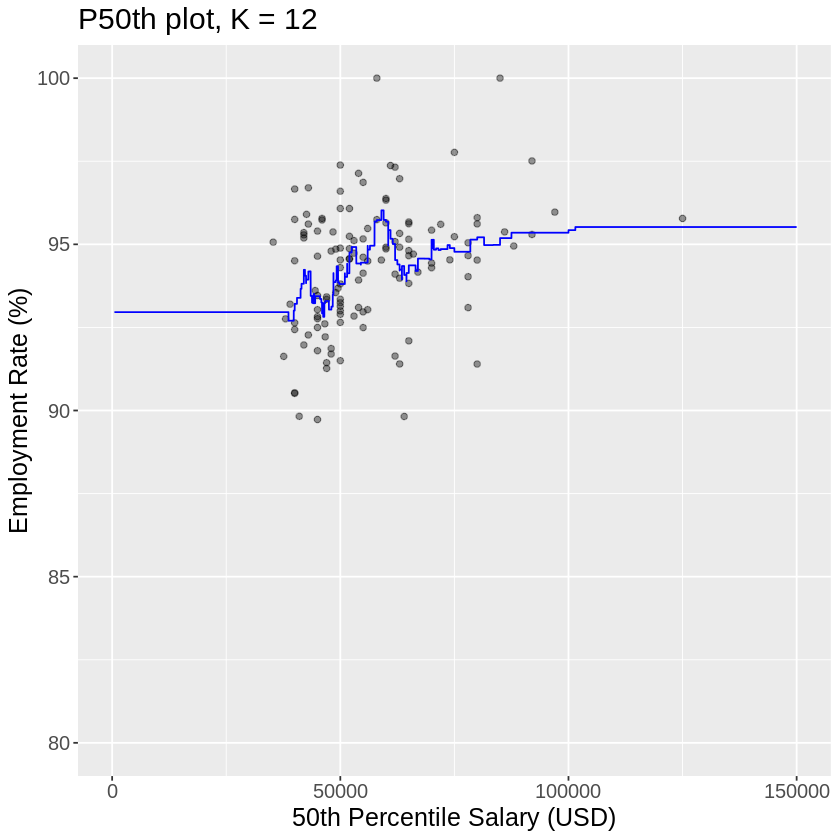

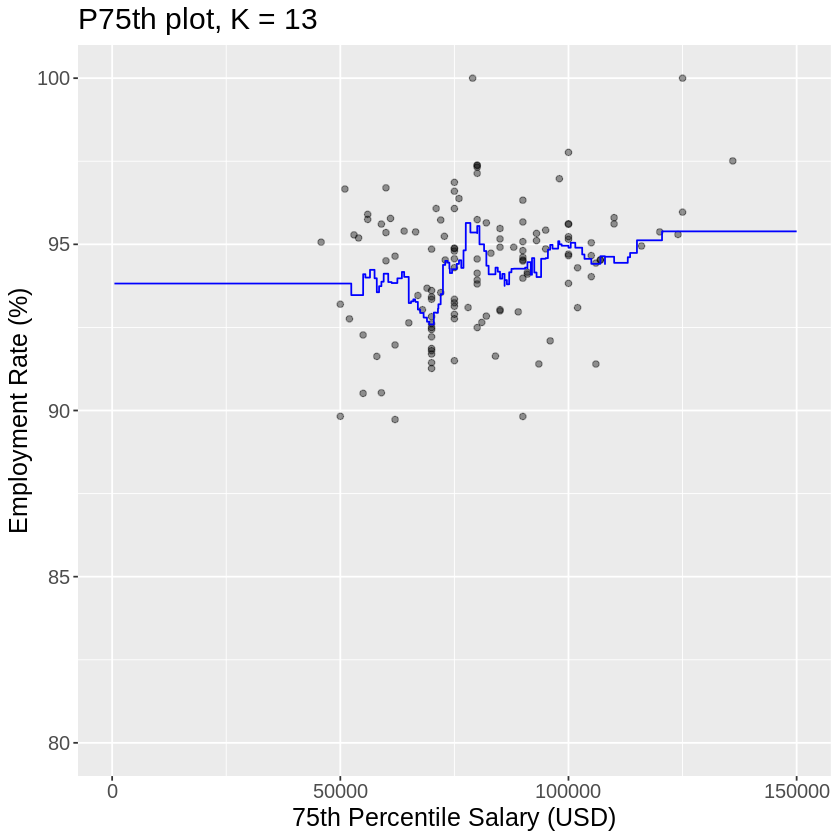

In [33]:
p25th_final
p50th_final
p75th_final

#### Median Salary Analysis (P50th)

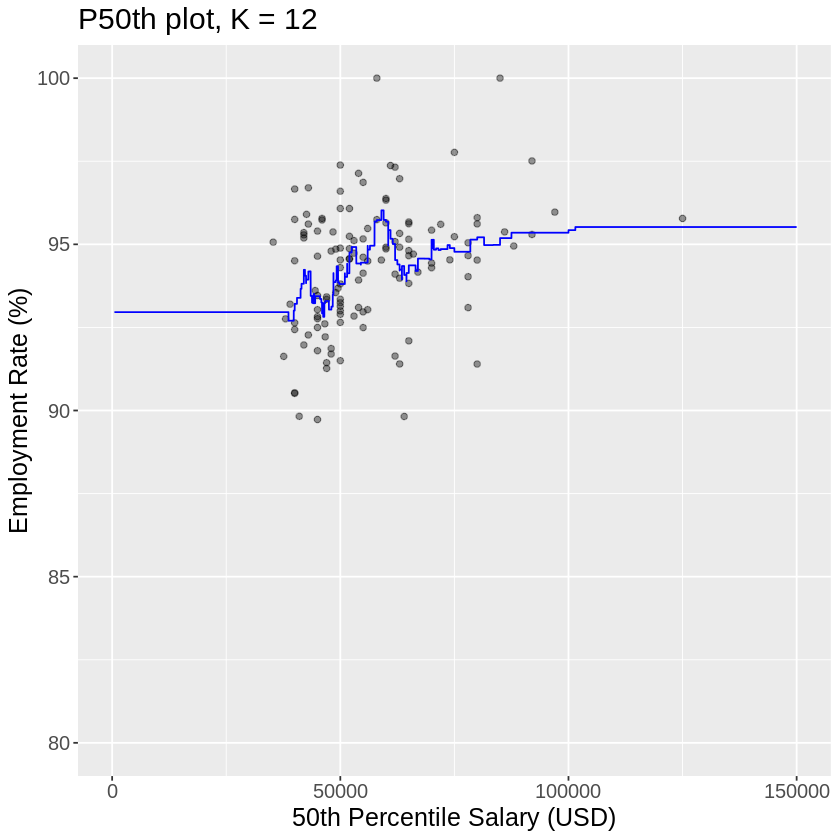

In [34]:
p50th_final

The K-NN regression plot for the Median Salary shows income ranging from around \\$35,000 to \\$130,000. The data points near the regression line range from a 90% to 100% employment rate, but most points lie between the range 91-97.5%. An increase in employment rate is also observed by the positive slope of the regression line.

As the data shown is a zoomed in, with the y-axis starting at around 80%, the regression line may seem to have a steeper slope. However, there is only about a 3-3.5% increase in employment rate as the median salary increases from \\$40,000 to \\$100,000. Therefore, there seems to be a weakly positive relationship between the median salary and employment rate. 

#### 25th Percentile Salary (P25th)

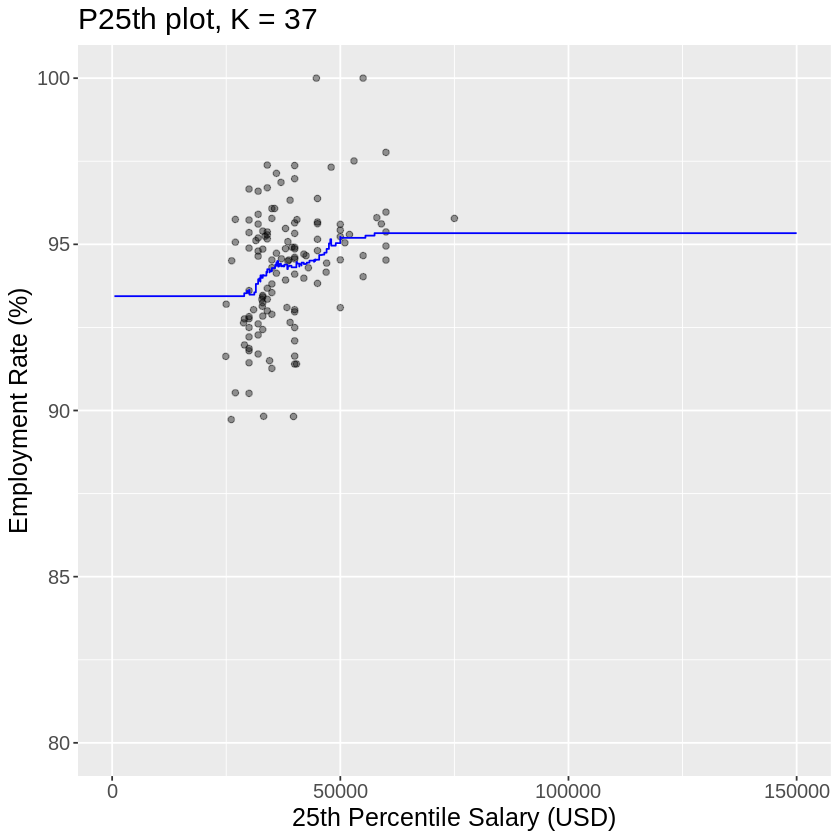

In [35]:
p25th_final

In the plot above, we see that the salaries range from about \\$25,000 to \\$75,000. While the employment rate ranges from around 90-100%, most data points show that the employment rate lies in the range of 92-97%. According to the regression line, the employment rate increases by about 1.5% from approximately 93.5% to 95% as the salaries increase from about \\$27,000 to \\$60,000. 

Similar to the Median salary results, there is a weakly positive relationship between the predictor variable, salary, and the response variable, employment rate. However, we see that the data points are clustered much more closely around the regression line compared to the median salary plot. 

#### 75th Percentile Salary

Warning message:
“Removed 1 rows containing missing values (geom_point).”


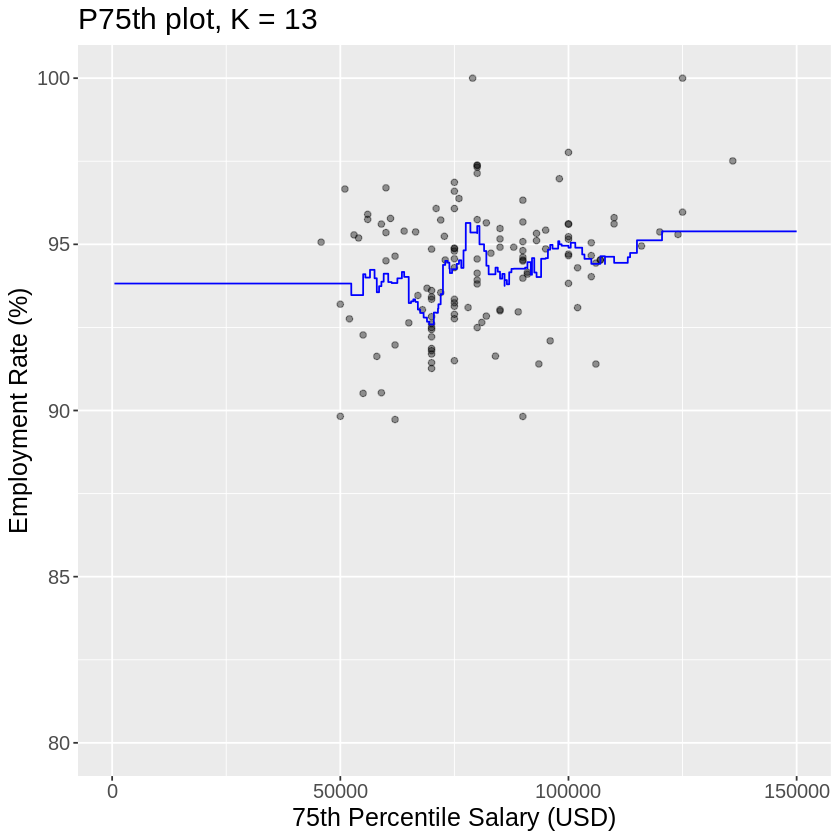

In [36]:
p75th_final

In the 75th percentile, the salaries range from about \\$50,000 to \\$140,000. While most of the data points show that the employment rate ranges from around 92 to 97%, we do see a wider range and more outliers, showing the visible range to be just below 90% to 100%. It is also observed that the data points are much more spread out and deviate a lot more from the regression line. 

Similar to the last two plots, there is a positive slope, showing approximately a 2% increase from 93.5% to 95.5% as the salary increases from \\$50,000 to \\$125,000. Therefore, this plot seems to show a weakly positive relationship between Salary and Employment Rate. 

## Part III: Discussion 

Across the three analyzed percentiles, there is a minimal 1% to 4% increased employment rate with increased salary, hinting that agencies are more likely to hire more candidates for higher-paying occupations. Therefore, our hypothesis – industries with higher salaries have lower employment rates – is not supported due to a lack of evidence and significance in the results. 

Even though there was a weak positive relationship between the two variables across all three analyzed percentiles, there was an expectation for the trend to be negative, with the 75th percentile having the most significant decrease in the employment rate. One potential explanation for the disagreement between our hypothesis and the results is the general ineffectiveness of salary on employment rates and the potential impact of other factors, including candidates' qualifications and level of education. Furthermore, another possible explanation for the disparity is that more industries (e.g., Tech Industry) are facing increased supply demands, causing them to hire more employees in all salary brackets to ensure they can meet their consumer needs.

In terms of future impacts, these findings can be helpful for companies when deciding which of their departments needs more support and how this can be done while complying with internal budgets. For instance, by looking at the results for each percentile, companies can see the recent increases in employment rate as it pertains to the corresponding jobs that fit within each salary bracket. By doing so, companies can ensure that all of their departments are growing at their desired rates and that no specific area is growing in size too slowly or quickly. Ultimately, this could prevent unexpected issues, such as hiring freezes, which contribute to the overall strength and stability of the business. This impact would likely be more applicable to large corporations (such as Amazon) since the bigger sample size in these scenarios allows us to have more accurate results. In addition to this, another future impact is that the government or other managing agencies can use these findings to ensure employees within all salary levels are balanced. By analyzing the changes in employment rates within each percentile, the overseeing agency can be sure that all job types are growing steadily, preventing any shortage of either employees or positions from occurring. In turn, this would help ensure that all social classes are contributing towards building the economy and prevent large social gaps from forming (e.g., 25th percentile salaries face decreased employment, whereas those in the 75th percentile drastically increase). Moreover, a final impact of these findings is the increase in economic preparedness in large-scale emergencies, such as the COVID-19 pandemic. Since this dataset was captured before the pandemic, using these findings would allow the government to know which precautionary actions to take (e.g., decrease mortgage rates) to ensure that the economy can quickly recover if another event such as the pandemic occurs.

Upon analyzing the final results, some future questions that stem from this project include: How might these findings change when looking at specific industries? How much would this data change if a recession were to occur? What sample size is ideal to ensure the maximum accuracy of these findings? These questions arose mainly because, in the original dataset, the information about the salaries and employment rates stemmed from many different career types mixed. Therefore, we would like to see how different and accurate our findings would be if individual analyses were done for each industry. Also, because these graphs assume job stability, we are interested in seeing how unexpected events (such as a recession) would ultimately show in our graphs. 


## Part IV: References

Bernard, A.; Morissette, R. (2018). Employment Rates and Wages of Core-aged Workers in Canada and the United States, 2000 to 2017. Statistics Canada. https://www150.statcan.gc.ca/n1/pub/11-626-x/11-626-x2018082-eng.htm

College majors and their graduates. (n.d.). Kaggle. https://www.kaggle.com/datasets/thedevastator/uncovering-insights-to-college-majors-and-their?resource=download&select=all-ages.csv

Millsap, A. A. (2018). How Higher Minimum Wages Impact Employment. Forbes. https://www.forbes.com/sites/adammillsap/2018/09/28/how-higher-minimum-wages-impact-employment/?sh=2bc68bce1e7d
